In [36]:
import bt
import pandas as pd
import numpy as np
import yfinance as yf
import traceback
import logging

In [37]:
# Lấy dữ liệu
data = bt.get('BTC-USD', start='2019-01-01')

In [63]:
# Tạo chiến lược
class MAcrossover(bt.Algo):
    def __init__(self, short_window, long_window):
        self.short_window = short_window
        self.long_window = long_window

    def __call__(self, target):
        # Tính toán MA
        short_ma = target.universe.rolling(self.short_window).mean()
        long_ma = target.universe.rolling(self.long_window).mean()

        # Xử lý NaN (nếu cần)
        short_ma = short_ma.fillna(method='ffill')
        long_ma = long_ma.fillna(method='ffill')

        # Xác định tín hiệu mua/bán
        entries = (short_ma > long_ma) & (short_ma.shift(1) <= long_ma.shift(1))
        exits = (short_ma < long_ma) & (short_ma.shift(1) >= long_ma.shift(1))

        # weights = long_ma.copy()
        weights = np.zeros_like(entries, dtype=np.float16)
        weights[entries] = 1.0
        weights[exits] = -1.0
        # weights.to_csv("wght_tables.csv")
        print("weights", weights)
        # Tạo tín hiệu trọng số (0 để bán, 1 để mua)
        # weights = entries.astype(float)  # Chuyển đổi True/False thành 1/0

        # Sử dụng WeighTarget để điều chỉnh trọng số
        return bt.algos.WeighTarget(weights)

100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


<Axes: title={'center': 'Equity Progression'}>

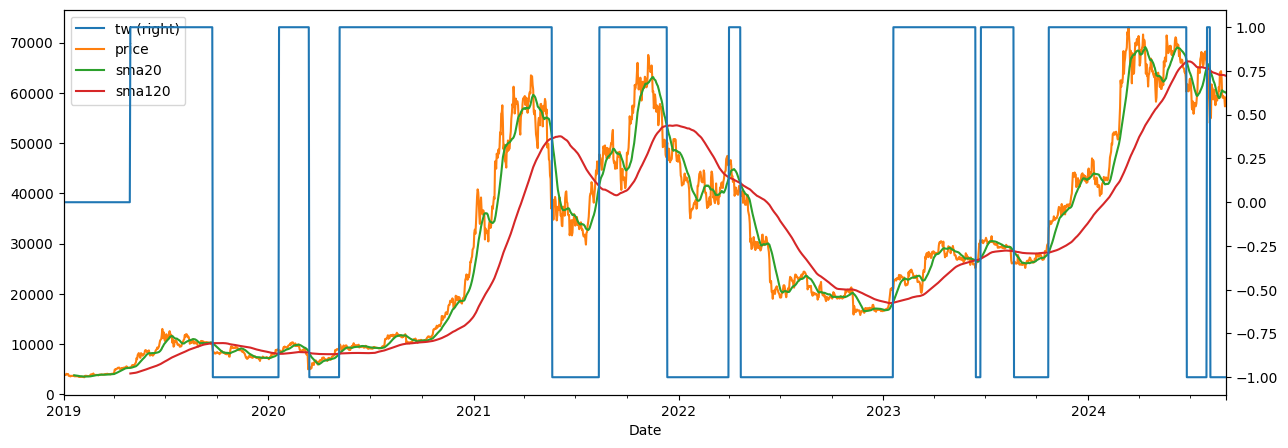

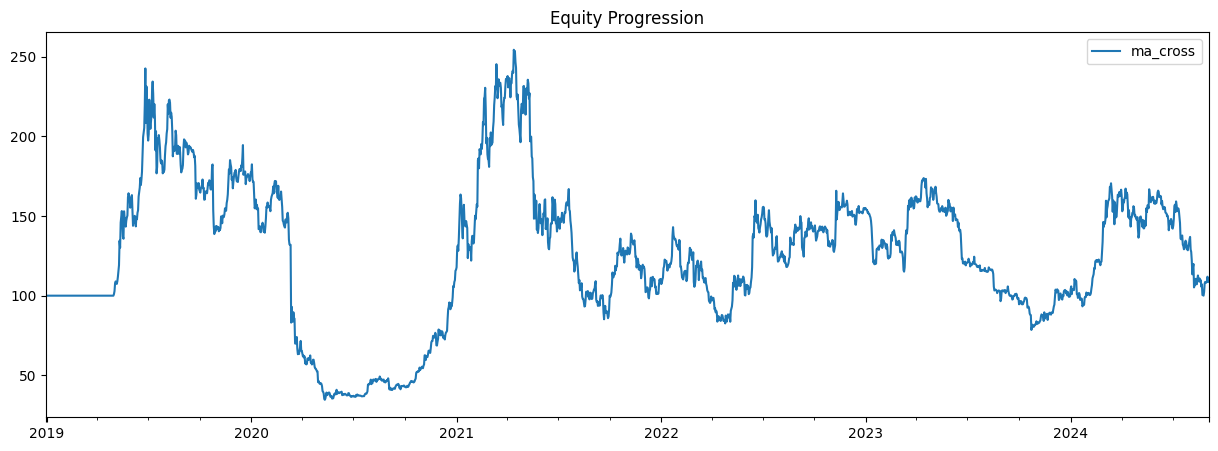

In [69]:
# For running only
data = bt.get('BTC-USD', start='2019-01-01')
sma20 = data.rolling(20).mean()
sma120 = data.rolling(120).mean()

tw = sma120.copy()
tw[sma20 > sma120] = 1.0
tw[sma20 <= sma120] = -1.0
tw[sma120.isnull()] = 0.0
tmp = bt.merge(tw, data, sma20, sma120)
tmp.columns = ['tw', 'price', 'sma20', 'sma120']
ax = tmp.plot(figsize=(15,5), secondary_y=['tw'])

ma_cross = bt.Strategy('ma_cross', [bt.algos.WeighTarget(tw),
                                    bt.algos.Rebalance()])

t = bt.Backtest(ma_cross, data)
res = bt.run(t)
res.plot()
res.display()

In [64]:
# Khởi tạo chiến lược
s = bt.Strategy('MA Crossover', 
    [MAcrossover(20, 120),
        bt.algos.Rebalance()])
# Backtest
test = bt.Backtest(s, data)
res = bt.run(test)

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\hoangvl\AppData\Local\Temp\ipykernel_1792\2244608825.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_ma = short_ma.fillna(method='ffill')
C:\Users\hoangvl\AppData\Local\Temp\ipykernel_1792\2244608825.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  long_ma = long_ma.fillna(method='ffill')
  0%|          | 0/1 [00:00<?, ?it/s]


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

Stat                 MA Crossover
-------------------  --------------
Start                2018-12-31
End                  2024-09-03
Risk-free rate       0.00%

Total Return         0.00%
Daily Sharpe         -
Daily Sortino        -
CAGR                 0.00%
Max Drawdown         0.00%
Calmar Ratio         -

MTD                  0.00%
3m                   0.00%
6m                   0.00%
YTD                  0.00%
1Y                   0.00%
3Y (ann.)            0.00%
5Y (ann.)            0.00%
10Y (ann.)           -
Since Incep. (ann.)  0.00%

Daily Sharpe         -
Daily Sortino        -
Daily Mean (ann.)    0.00%
Daily Vol (ann.)     0.00%
Daily Skew           0.00
Daily Kurt           -
Best Day             0.00%
Worst Day            0.00%

Monthly Sharpe       -
Monthly Sortino      -
Monthly Mean (ann.)  0.00%
Monthly Vol (ann.)   0.00%
Monthly Skew         0.00
Monthly Kurt         -
Best Month           0.00%
Worst Month          0.00%

Yearly Sharpe        -
Yearly Sortino  

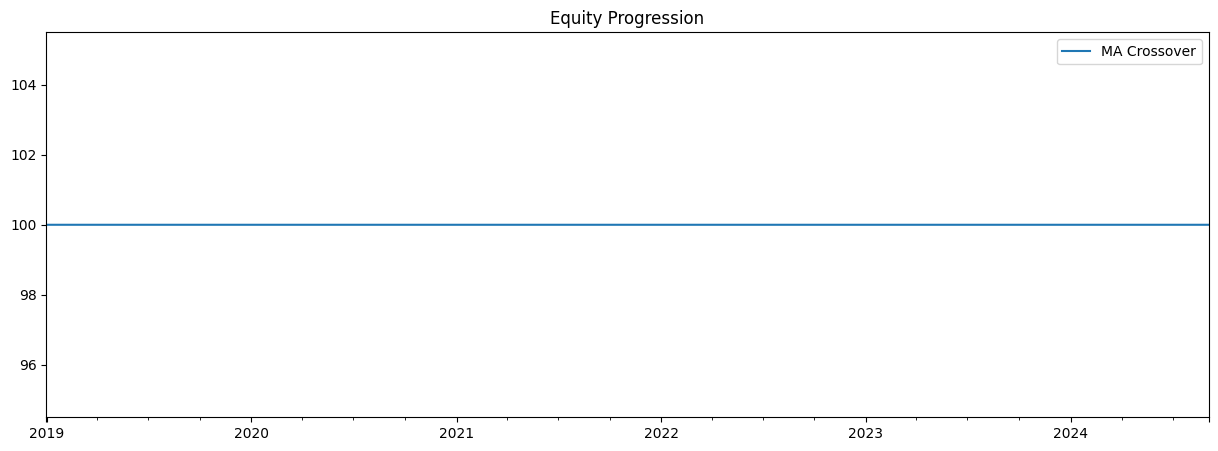

In [62]:
# Hiển thị kết quả
res.plot()
res.display()